In [1]:
### Sliding window 1 week
### predict 8 th day
### lookback 35
### Linear Regression

In [57]:
import sys
sys.path.append('/home/jovyan/work/')
sys.path.append('/home/jovyan/work/src')
sys.path.append('/home/jovyan/work/src/data')
sys.path.append('/home/jovyan/work/src/data_explore')
sys.path.append('/home/jovyan/work/src/features')
sys.path.append('/home/jovyan/work/src/models')
sys.path.append('/home/jovyan/work/src/analysis')


In [58]:
print(sys.path)

['/home/jovyan/work/notebooks', '/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis']


In [59]:
from src import data,data_explore,features
from data import create_input_data
from data_explore import explore_util
from features import build_features
from models import train_model,predict_model
from analysis import analyze_pred

import pandas as pd

In [9]:
def get_jobs_in_range(dfq,start,end):
    df1=dfq.query('submit >= @start and submit < @end')
    return df1

In [10]:
# weekly prediction for the month of March
from importlib import reload
reload(create_input_data)

lookback=35 #rows_discard=34
col_name="queue_minutes"

df_arr={}
df_feb_aug = create_input_data.read_data(csv_file_name="../data/processed/lookback35_anon_feb1_aug1.csv", parse_dates_col=[4,5,6])

op_df_jul,rows_to_discard=create_input_data.optimised_add_past_k_obs_insert(lookback, df_jul,col_name)

#df_arr['1wee']= get_jobs_in_range(df_feb_aug,"2022-03-01","2022-03-07")
#df_arr['april']= get_jobs_in_range(df_feb_aug,"2022-04-01","2022-05-01")


In [73]:
## Train 1 week and predict one day
start_train_weeks=[]
end_train_weeks=[]
predict_day=[]
day1 = pd.Timestamp("2022-03-01")
start_train_weeks.append(day1)
#day8 = day1_mar + pd.Timedelta("7 days")
next_week = day1
day2 = day1
for i in range(0,25):
    next_week=next_week + pd.Timedelta("7 days")
    end_train_weeks.append(next_week)
    predict_day.append(next_week)
    day2 = day2 + pd.Timedelta("1 days")
    next_week = day2
    start_train_weeks.append(next_week)
for i in range(0,25):
    print("start: " + str(start_train_weeks[i]) + ": " + str(start_train_weeks[i].day_name()) + " end: " 
          + str(end_train_weeks[i]) + " : " + str(end_train_weeks[i].day_name()))
    print("predict: " + str(predict_day[i].day_name()))

start: 2022-03-01 00:00:00: Tuesday end: 2022-03-08 00:00:00 : Tuesday
predict: Tuesday
start: 2022-03-02 00:00:00: Wednesday end: 2022-03-09 00:00:00 : Wednesday
predict: Wednesday
start: 2022-03-03 00:00:00: Thursday end: 2022-03-10 00:00:00 : Thursday
predict: Thursday
start: 2022-03-04 00:00:00: Friday end: 2022-03-11 00:00:00 : Friday
predict: Friday
start: 2022-03-05 00:00:00: Saturday end: 2022-03-12 00:00:00 : Saturday
predict: Saturday
start: 2022-03-06 00:00:00: Sunday end: 2022-03-13 00:00:00 : Sunday
predict: Sunday
start: 2022-03-07 00:00:00: Monday end: 2022-03-14 00:00:00 : Monday
predict: Monday
start: 2022-03-08 00:00:00: Tuesday end: 2022-03-15 00:00:00 : Tuesday
predict: Tuesday
start: 2022-03-09 00:00:00: Wednesday end: 2022-03-16 00:00:00 : Wednesday
predict: Wednesday
start: 2022-03-10 00:00:00: Thursday end: 2022-03-17 00:00:00 : Thursday
predict: Thursday
start: 2022-03-11 00:00:00: Friday end: 2022-03-18 00:00:00 : Friday
predict: Friday
start: 2022-03-12 00:00

In [83]:
df_predict={}
for i in range(0,24):
    df_arr['week'+ str(i+1)]= get_jobs_in_range(df_feb_aug,start_train_weeks[i], end_train_weeks[i])
    df_predict['day'+ str(i+1)] = get_jobs_in_range(df_feb_aug,predict_day[i], predict_day[i+1])

In [84]:
week_names=[]
for i in range(0,24):
    week_names.append('week'+str(i+1))
print(week_names)    

['week1', 'week2', 'week3', 'week4', 'week5', 'week6', 'week7', 'week8', 'week9', 'week10', 'week11', 'week12', 'week13', 'week14', 'week15', 'week16', 'week17', 'week18', 'week19', 'week20', 'week21', 'week22', 'week23', 'week24']


In [78]:
df_arr['week25']

,jobid,user,account,state,submit,start,end,reqcpus,nnodes,max_minutes,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
70166,9344895,d6e8d43dd686085272656743769b2b7106aa7aa1083833...,3882b557216cd18690da6d7121ed547a8c976bee6b5e49...,COMPLETED,2022-03-25 00:00:03,2022-03-25 03:45:12,2022-03-25 21:14:04,1,1,2880,...,0,0,0,0,0,0,2,0,0,0
70167,9344898,d6e8d43dd686085272656743769b2b7106aa7aa1083833...,3882b557216cd18690da6d7121ed547a8c976bee6b5e49...,COMPLETED,2022-03-25 00:00:10,2022-03-25 03:45:12,2022-03-25 20:49:23,1,1,2880,...,0,0,0,0,0,0,2,0,0,0
70168,9344899,d6e8d43dd686085272656743769b2b7106aa7aa1083833...,3882b557216cd18690da6d7121ed547a8c976bee6b5e49...,COMPLETED,2022-03-25 00:00:18,2022-03-25 03:45:12,2022-03-25 21:14:04,1,1,2880,...,0,0,0,0,0,0,2,0,0,0
70169,9344900,d6e8d43dd686085272656743769b2b7106aa7aa1083833...,3882b557216cd18690da6d7121ed547a8c976bee6b5e49...,COMPLETED,2022-03-25 00:00:26,2022-03-25 03:45:12,2022-03-25 21:01:18,1,1,2880,...,0,0,0,0,0,0,0,2,0,0
70170,9344901,d6e8d43dd686085272656743769b2b7106aa7aa1083833...,3882b557216cd18690da6d7121ed547a8c976bee6b5e49...,COMPLETED,2022-03-25 00:00:32,2022-03-25 03:45:19,2022-03-25 20:36:41,1,1,2880,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80884,9382706,198adb7cee4a179c48a896ae776be358cfb45d615c11df...,65c812caf3c7dd6c293c81a86410b39b41ab4e3b1c80e8...,COMPLETED,2022-03-31 23:50:36,2022-03-31 23:51:04,2022-03-31 23:51:37,24,1,20,...,74,75,1,75,76,76,76,77,77,0
80885,9382709,0a1e657dab6518a9fb0cc16da176d6fcfac57cea6efb08...,346849be0324afaef1154c59d4aaf3782f4954e891c580...,COMPLETED,2022-03-31 23:51:38,2022-04-01 05:14:21,2022-04-01 05:14:37,64,1,2880,...,74,74,75,1,75,76,76,76,77,77
80886,9382711,198adb7cee4a179c48a896ae776be358cfb45d615c11df...,65c812caf3c7dd6c293c81a86410b39b41ab4e3b1c80e8...,COMPLETED,2022-03-31 23:52:12,2022-03-31 23:52:23,2022-03-31 23:54:02,48,4,30,...,74,74,75,1,75,76,76,76,77,77
80887,9382722,198adb7cee4a179c48a896ae776be358cfb45d615c11df...,65c812caf3c7dd6c293c81a86410b39b41ab4e3b1c80e8...,COMPLETED,2022-03-31 23:54:44,2022-03-31 23:55:01,2022-04-01 00:02:40,48,4,30,...,1,74,74,75,1,75,76,76,76,77


In [86]:
df_predict['day1']

,jobid,user,account,state,submit,start,end,reqcpus,nnodes,max_minutes,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
44522,9264440,1e94032cb929373ffe8edc8761fcf62741fc8312d6140d...,e518824e2cd46680ad7e25759f168bb4affb5afbffb5b0...,COMPLETED,2022-03-08 00:00:56,2022-03-08 06:15:04,2022-03-09 10:39:33,120,5,2880,...,0,0,0,0,0,0,0,0,0,0
44523,9264443,5315c0d39d9b80958306da0d58d4c80f23511dbf320c59...,13f12669b2c1d64b36b4333e0df18511fec7136beb13a9...,COMPLETED,2022-03-08 00:03:05,2022-03-08 00:39:52,2022-03-08 02:37:27,256,4,120,...,17,14,14,14,14,14,14,14,14,6
44524,9264453,41d85cea6d357d42e23d07231155f073580245cef425a1...,c171b107c6f21114432f6b057a4911169e3df44f35e38a...,COMPLETED,2022-03-08 00:06:22,2022-03-08 06:15:29,2022-03-08 09:32:32,1,1,2880,...,17,17,14,14,14,14,14,14,14,14
44525,9264493,ea61bb2d95cf16714cedc5e4ec63ffbc5834968418511c...,1d4712c264238a06f8d4af03724155dc82e877f41430eb...,COMPLETED,2022-03-08 00:18:44,2022-03-08 01:38:42,2022-03-08 02:42:35,68,1,180,...,17,17,17,17,17,17,17,14,14,14
44526,9264494,ea61bb2d95cf16714cedc5e4ec63ffbc5834968418511c...,1d4712c264238a06f8d4af03724155dc82e877f41430eb...,COMPLETED,2022-03-08 00:19:07,2022-03-08 01:38:42,2022-03-08 03:15:25,68,1,180,...,17,17,17,17,17,17,17,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45869,9269007,645c687165564fa805fd7245fbb41102cb3ccc1d45aac5...,ba26d9b434c5fa30f5fee7024a1a70f0e30f44be856ed8...,COMPLETED,2022-03-08 23:37:00,2022-03-09 03:02:49,2022-03-09 03:12:16,256,8,120,...,0,2,0,19,17,3,22,18,13,79
45870,9269008,645c687165564fa805fd7245fbb41102cb3ccc1d45aac5...,ba26d9b434c5fa30f5fee7024a1a70f0e30f44be856ed8...,COMPLETED,2022-03-08 23:37:06,2022-03-09 03:03:24,2022-03-09 03:20:02,256,8,120,...,0,2,0,19,17,3,22,18,13,79
45871,9269017,100dd935adb232830f84e5a1a9ce5540deeffb477b5205...,8d798419e042f4a78bfa4af0adbeb70aab558ae3ad0209...,COMPLETED,2022-03-08 23:40:18,2022-03-08 23:45:50,2022-03-08 23:54:54,10,1,120,...,9,20,0,2,0,19,17,3,22,18
45872,9269048,ea61bb2d95cf16714cedc5e4ec63ffbc5834968418511c...,1d4712c264238a06f8d4af03724155dc82e877f41430eb...,COMPLETED,2022-03-08 23:54:42,2022-03-09 02:38:21,2022-03-09 09:06:48,252,4,720,...,16,2,0,0,9,0,18,1,9,20


In [87]:
def train_test_data(month,df_arr):
    X_historydata = df_arr[month]
    ## remove default columns
    df = build_features.remove_default_cols(df_arr[month])
    Y_waittimedata = df['queue_minutes']
    X_historydata= build_features.remove_cols(df,['queue_minutes','run_minutes'])
    return X_historydata, Y_waittimedata

In [80]:
from sklearn.linear_model import LinearRegression
def train_model_LR(X_historydata_norm, Y_waittimedata_train):
    lreg = LinearRegression().fit(X_historydata_norm, Y_waittimedata_train)
    model_score = lreg.score(X_historydata_norm, Y_waittimedata_train)
    return lreg, model_score

In [81]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def predict_evaluate(lreg,scaler,X_historydata_test,Y_waittimedata_test):
    y_pred=lreg.predict(scaler.transform(X_historydata_test))
    y_pred = np.where(y_pred<0,0,y_pred)
    r2s = r2_score(Y_waittimedata_test.to_numpy(),y_pred)
    mse = mean_squared_error(Y_waittimedata_test.to_numpy(),y_pred,squared=False)
    mae = mean_absolute_error(Y_waittimedata_test.to_numpy(),y_pred)
    return y_pred, r2s, mse, mae

In [49]:
from importlib import reload
reload(analyze_pred)
reload(build_features)


<module 'features.build_features' from '/home/jovyan/work/src/features/build_features.py'>

In [127]:
from importlib import reload
import numpy as np
reload(analyze_pred)
reload(build_features)
results=[]
for i in range(0,24):
    result = {}
    result['train_week']= start_train_weeks[i]
    result['predict_day']= predict_day[i]
    X_historydata_train, Y_waittimedata_train = train_test_data(week_names[i],df_arr)
    X_historydata_test, Y_waittimedata_test = train_test_data('day'+str(i+1),df_predict)
    X_historydata_norm, scaler = build_features.standardization(X_historydata_train)
    lreg, model_score = train_model_LR(X_historydata_norm, Y_waittimedata_train)
    y_pred, r2s, mse, mae = predict_evaluate(lreg,scaler,X_historydata_test,Y_waittimedata_test)
    provision_time = 20
    tolerance_factor = 3
    provision_time, n_scheduled, n_missed, no_missed, wrongly_scheduled, t_num = analyze_pred.analysis_short(0,Y_waittimedata_test.shape[0], Y_waittimedata_test, y_pred.ravel(),
                                                                                                          provision_time=provision_time, tolerance_factor=tolerance_factor)
    
    result['ideally_sched'] = n_scheduled
    result['missed'] = n_missed

    result['wrongly_sched'] = wrongly_scheduled
    result['total_num'] = t_num
    result['%_wrongly_sched'] = (wrongly_scheduled/t_num)*100
    result['%_ideally_sched'] = (n_scheduled/t_num)*100
    result['%_missed_opp.'] = (n_missed/n_scheduled)*100
    result['t_wrong_sched_%'] = (wrongly_scheduled/(wrongly_scheduled + no_missed))*100
    result['r2s'] = r2s
    result['mse'] = mse
    result['mae'] = mae
    result['model_score'] = model_score
    #result['model'] = lreg
    result['y_pred'] = y_pred
    #result['not_missed'] = no_missed
    #result['provision_time'] = provision_time
    results.append(result)
    #print(result)
    #print("\n")


In [128]:
reload(analyze_pred)
rdf = analyze_pred.add_all_to_df(results)

In [129]:
rdf

,train_week,predict_day,ideally_sched,missed,wrongly_sched,total_num,%_wrongly_sched,%_ideally_sched,%_missed_opp.,t_wrong_sched_%,r2s,mse,mae,model_score,y_pred
0,2022-03-01,2022-03-08,691,216,163,1352,12.056213,51.109467,31.259045,25.548589,0.041539,204.579738,140.473886,0.305524,"[942.3339687610461, 195.85962296056238, 700.40..."
1,2022-03-02,2022-03-09,953,487,367,3437,10.677917,27.727669,51.101784,44.057623,-0.287922,196.677988,78.271223,0.315401,"[84.63748579802467, 0.0, 0.0, 450.728746548728..."
2,2022-03-03,2022-03-10,905,894,1,3152,0.031726,28.711929,98.784530,8.333333,-0.432990,139.886022,72.106400,0.313692,"[969.3692616703543, 587.1404269170205, 1056.52..."
3,2022-03-04,2022-03-11,899,369,926,2954,31.347326,30.433311,41.045606,63.598901,-0.214093,267.842762,131.853158,0.293922,"[0.0, 0.0, 0.0, 119.60992420018954, 401.091882..."
4,2022-03-05,2022-03-12,461,139,284,1043,27.229147,44.199425,30.151844,46.864686,-0.190655,209.276042,144.938127,0.282514,"[0.0, 0.0, 73.96676247760269, 0.0, 507.5391562..."
5,2022-03-06,2022-03-13,401,129,110,678,16.224189,59.144543,32.169576,28.795812,-0.018264,225.506305,171.071149,0.369262,"[210.8654183376442, 84.72232332594164, 421.427..."
6,2022-03-07,2022-03-14,727,67,556,1471,37.797417,49.422162,9.215956,45.723684,0.051532,769.060881,194.336200,0.354008,"[438.3758985048721, 438.64507936513746, 438.91..."
7,2022-03-08,2022-03-15,768,4,711,1533,46.379648,50.097847,0.520833,48.203390,0.024373,1796.681946,311.101414,0.185295,"[485.92868447602893, 108.94760144259207, 183.0..."
8,2022-03-09,2022-03-16,693,18,145,1047,13.849093,66.189112,2.597403,17.682927,0.071134,461.655481,344.233822,0.088917,"[534.5278367258697, 43.680279900247115, 445.05..."
9,2022-03-10,2022-03-17,529,1,247,777,31.788932,68.082368,0.189036,31.870968,0.259598,369.412853,307.322629,0.119053,"[385.3644599549594, 474.068309379774, 346.4757..."


In [130]:
# write to file
from pathlib import Path  
filepath = Path('../data/processed/sliding_window_lookback35_LR_anon_march31.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
rdf.to_csv(filepath,index=False)

(array([19060., 19064., 19068., 19072., 19076., 19080., 19083.]),
 [Text(19060.0, 0, '2022-03-09'),
  Text(19064.0, 0, '2022-03-13'),
  Text(19068.0, 0, '2022-03-17'),
  Text(19072.0, 0, '2022-03-21'),
  Text(19076.0, 0, '2022-03-25'),
  Text(19080.0, 0, '2022-03-29'),
  Text(19083.0, 0, '2022-04-01')])

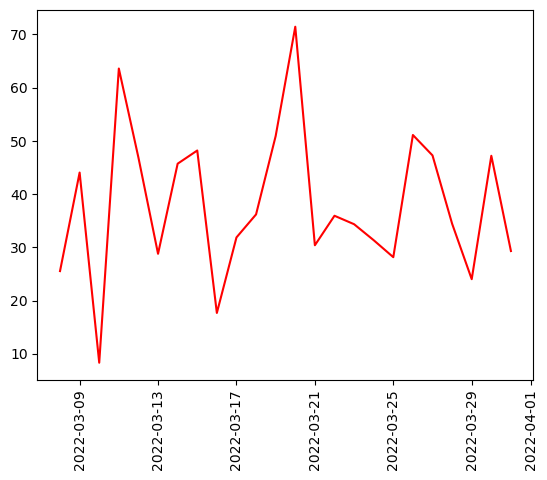

In [131]:
t_wrong_sched= [] 


for i in range(0,24):
    t_wrong_sched.append(results[i]['t_wrong_sched_%'])
plt.plot(predict_day[0:24],t_wrong_sched,'r')
plt.xticks(rotation=90)


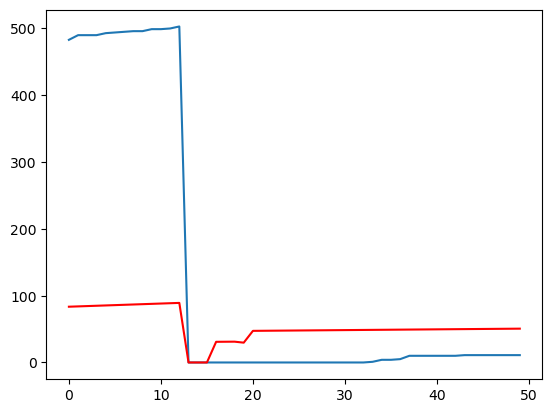

In [132]:
import matplotlib.pyplot as plt
plt.plot(df_predict['day1']['queue_minutes'].to_numpy()[150:200])
plt.plot(results[0]['y_pred'][150:200],'r')

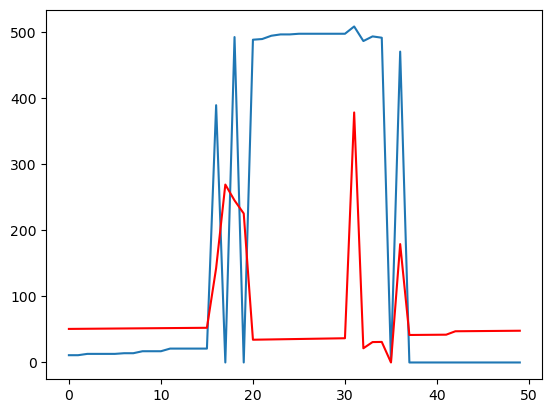

In [111]:
plt.plot(df_predict['day1']['queue_minutes'].to_numpy()[200:250])
plt.plot(results[0]['y_pred'][200:250],'r')

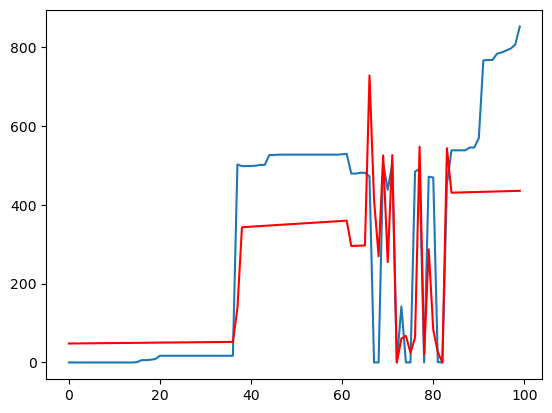

In [112]:
plt.plot(df_predict['day1']['queue_minutes'].to_numpy()[250:350])
plt.plot(results[0]['y_pred'][250:350],'r')

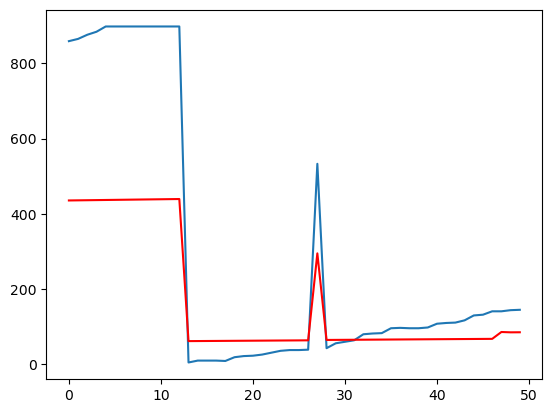

In [113]:
plt.plot(df_predict['day1']['queue_minutes'].to_numpy()[350:400])
plt.plot(results[0]['y_pred'][350:400],'r')

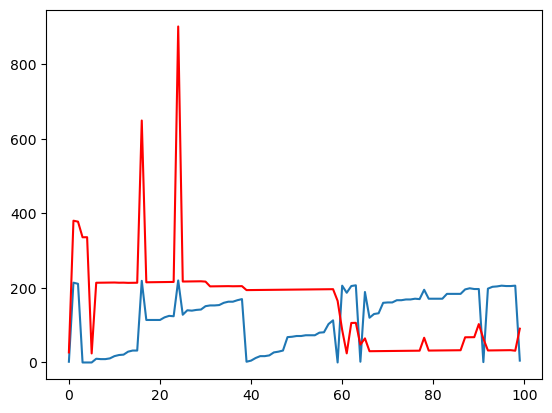

In [114]:
plt.plot(df_predict['day1']['queue_minutes'].to_numpy()[1250:1350])
plt.plot(results[0]['y_pred'][1250:1350],'r')